In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import csv

In [2]:
train_set = []
with open('data_k_mean.txt','r') as file:
    new_reader = csv.reader(file,delimiter=' ')
    for row in new_reader:
        train_set.append(row)

In [3]:
for i in range(len(train_set)):
    for j in range(len(train_set[i])):
        train_set[i][j] = float(train_set[i][j])

In [4]:
x = []
for train in train_set:
    x.append(train[0])
y = []
for train in train_set:
    y.append(train[1])

In [5]:
train_set_array = np.array(train_set)

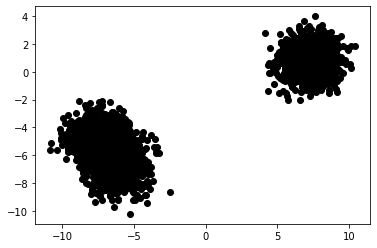

In [6]:
plt.plot(train_set_array[:,0:1],train_set_array[:, 1:], linestyle = '', marker='o', color='k')
plt.show()

In [7]:
X = pd.DataFrame({'x': x,
                 'y': y})

In [8]:
k = int(input("Enter the Value of K: "))
Centroids = (X.sample(n=k))

Enter the Value of K: 2


In [9]:
Centroids

,x,y
686,-5.34386,-7.11979
1171,-5.20518,-7.98521


In [10]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["x","y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['x'] - Centroids['x']).sum() + (Centroids_new['y'] - Centroids['y']).sum()
    Centroids = X.groupby(["Cluster"]).mean()[["x","y"]]

In [11]:
X.head()

,x,y,1,2,Cluster
0,-7.87157,-4.86573,16.112201,1.357628,2
1,-4.76661,-6.87944,14.224562,2.355166,2
2,-6.67986,-5.83080,15.391237,0.175846,2
3,-8.93021,-4.15571,16.886598,2.629625,2
4,-7.91375,-4.22840,15.940040,1.852042,2


In [12]:
X.tail()

,x,y,1,2,Cluster
2995,-8.06037,-4.84080,16.280529,1.523229,2
2996,7.47328,0.37321,0.481895,15.535514,1
2997,6.91832,-0.32132,1.143505,14.758603,1
2998,-8.23828,-4.00405,16.180665,2.228715,2
2999,-5.75112,-5.99531,14.633523,1.100737,2


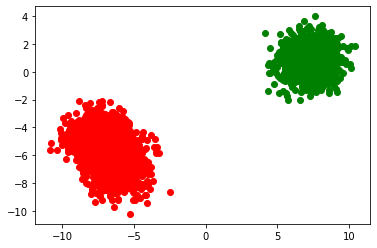

In [13]:
color=['green','red','cyan']
for l in range(k):
    data=X[X["Cluster"]==l+1]
    plt.scatter(data["x"],data["y"],c=color[l])
plt.show()